### PRiAD - Projekt: Analiza Eksploracyjna Danych  
**Stanisław Dutkiewicz, Piotr Szepietowski**  
**Zbiór danych**: [Car Prices Poland](https://www.kaggle.com/datasets/aleksandrglotov/car-prices-poland/data)  
**Cel projektu**: Analiza eksploracyjna wybranego zbioru danych 

---

### 1. Wstępna analiza zbioru danych

W ramach projektu przeprowadzamy wstępną analizę zbioru danych, która obejmuje:

- Wyznaczenie łącznej liczby obiektów (obserwacji) w zbiorze danych.
- Sprawdzenie liczby unikalnych klas (np. marek samochodów, jeśli dotyczy).
- Wyznaczenie liczby obiektów w każdej klasie.
- Określenie liczby atrybutów (cech) w zbiorze danych.
- Zliczenie brakujących danych w każdej kolumnie.

W dalszej analizie usunięte zostaną obiekty, które zawierają brakujące dane, aby zapewnić spójność analiz. Poniżej znajduje się kod wykonujący powyższe zadania:


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie zbioru danych
df = pd.read_csv('Car_Prices_Poland_Kaggle.csv')

# Usunięcie kolumny 'Unnamed: 0', która jest zbędna
df.drop(columns=['Unnamed: 0'], inplace=True)

# Wyświetlenie pierwszych 5 wierszy danych
df.head()

# Liczba obiektów (obserwacji)
print(f"Liczba obiektów: {df.shape[0]}")

# Liczba klas (np. marek samochodów)
print(f"Liczba klas (marek): {df['mark'].nunique()}")

# Liczba obiektów w każdej klasie
print("\nLiczba obiektów w każdej klasie:")
print(df['mark'].value_counts())

# Liczba atrybutów (cech)
print(f"\nLiczba atrybutów: {df.shape[1]}")

# Liczba brakujących danych
print(f"\nLiczba brakujących danych: {df.isna().sum().sum()}")

# Usunięcie danych brakujących
df.dropna(inplace=True)

# Potwierdzenie liczby obiektów po usunięciu braków danych
print(f"\nLiczba obiektów po usunięciu brakujących danych: {df.shape[0]}")


Liczba obiektów: 117927
Liczba klas (marek): 23

Liczba obiektów w każdej klasie:
mark
audi             12031
opel             11914
bmw              11070
volkswagen       10848
ford              9664
mercedes-benz     7136
renault           6976
skoda             5888
toyota            5120
peugeot           5056
volvo             4384
hyundai           4032
kia               3744
nissan            3072
fiat              2880
mazda             2848
seat              2848
citroen           2720
honda             2176
mitsubishi        1120
mini              1088
alfa-romeo         704
chevrolet          608
Name: count, dtype: int64

Liczba atrybutów: 10

Liczba brakujących danych: 30085

Liczba obiektów po usunięciu brakujących danych: 87842


---
### 2. Analiza zmienności atrybutów

W tej części projektu analizujemy zmienność poszczególnych atrybutów:

- Globalnie, w całym zbiorze danych.
- W podziale na klasy (marki samochodów).

Wyniki przedstawiono na odpowiednich wykresach. Poniżej znajduje się kod wykorzystany do analizy.


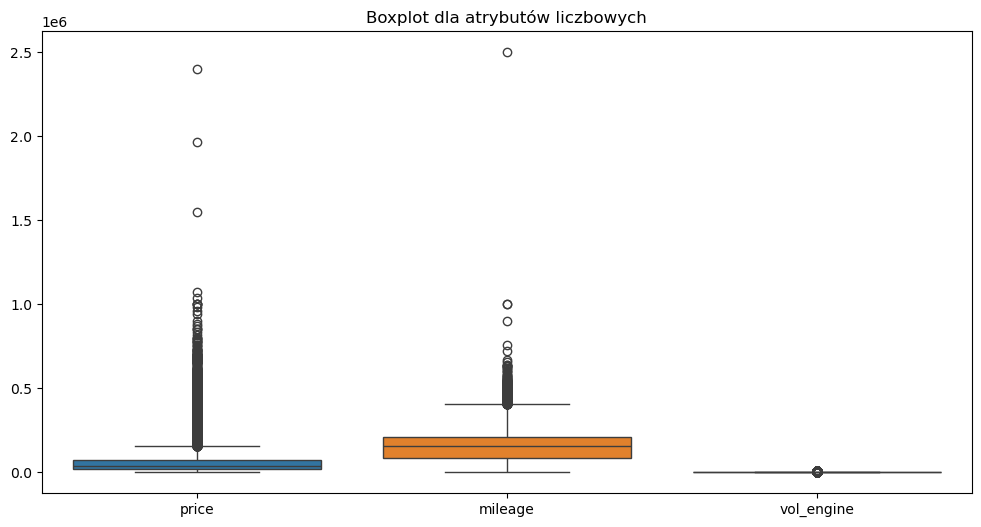

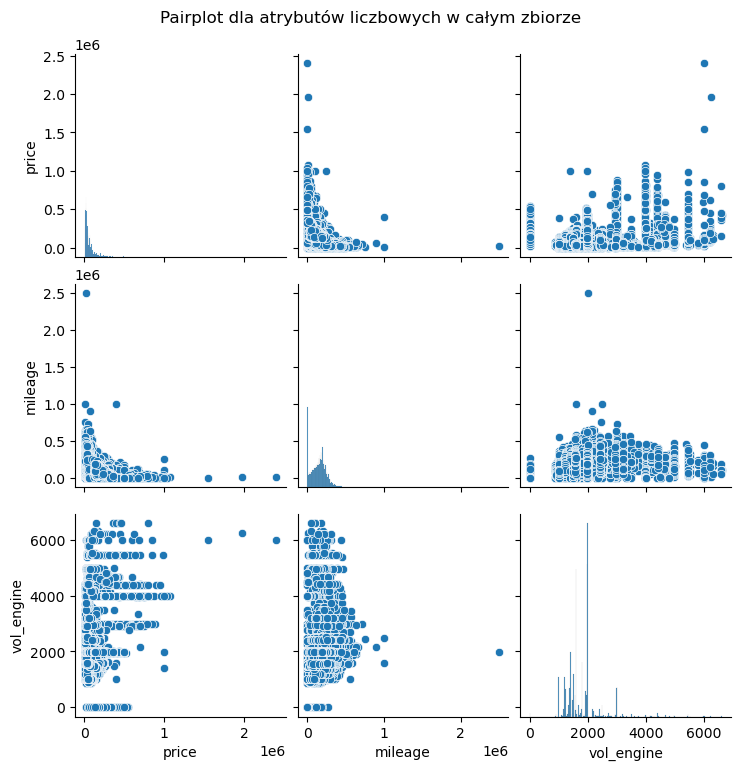

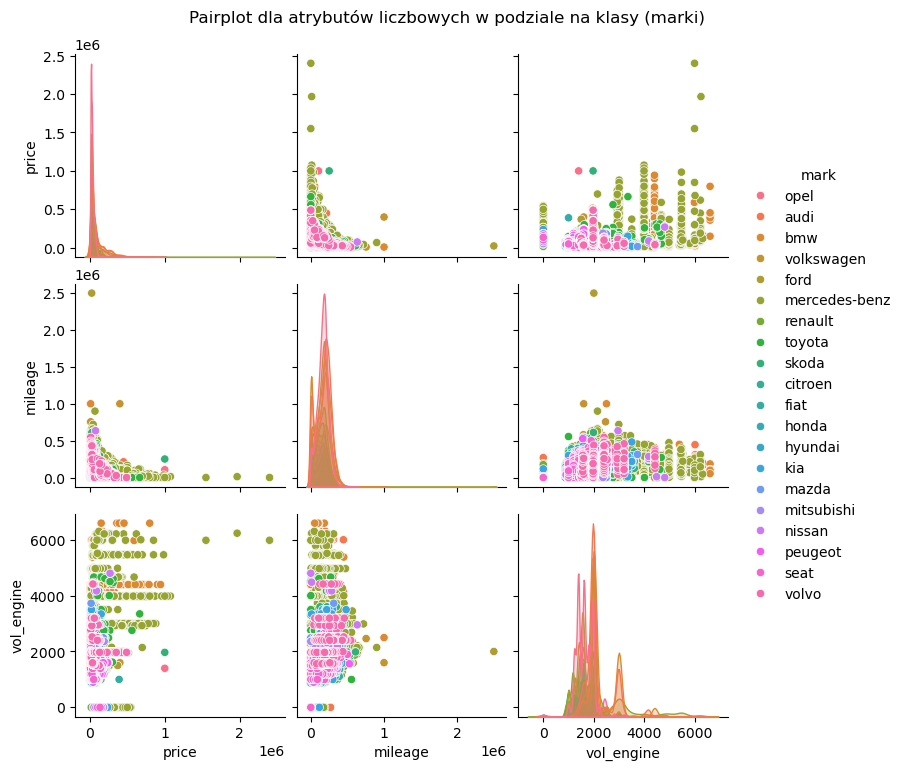

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot dla wszystkich danych liczbowych
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['price', 'mileage', 'vol_engine']])
plt.title("Boxplot dla atrybutów liczbowych")
plt.show()

# Pairplot dla atrybutów liczbowych
sns.pairplot(df[['price', 'mileage', 'vol_engine']])
plt.suptitle("Pairplot dla atrybutów liczbowych w całym zbiorze", y=1.02)
plt.show()

# Pairplot w podziale na klasy (marki samochodów)
sns.pairplot(df[['price', 'mileage', 'vol_engine', 'mark']], hue='mark')
plt.suptitle("Pairplot dla atrybutów liczbowych w podziale na klasy (marki)", y=1.02)
plt.show()


### Wnioski do punktu 2

* **Zadanie 2 - wnioski**  
  - Największą zmienność w całym zbiorze wykazuje atrybut `price` (cena), co widać na boxplotach.  
  - Atrybut `mileage` (przebieg) ma najbardziej porozrzucane dane, co utrudnia jego interpretację.  
  - Pomiędzy atrybutami `price` i `mileage` widać umiarkowaną zależność – większy przebieg często wiąże się z niższą ceną.  
  - W przypadku pairplotów w podziale na marki (`mark`), marki premium (np. BMW, Mercedes) mają wyraźnie wyższe ceny w porównaniu do marek budżetowych.  
  - Większość marek wykazuje rozrzut danych, ale brak wyraźnego rozgraniczenia pomiędzy ich atrybutami liczbowymi.  



---
### 3. Analiza korelacji i zdolności rozróżnienia klas

W tej części projektu analizujemy:
1. Stopień korelacji pomiędzy poszczególnymi atrybutami liczbowymi.
2. W jakim stopniu poszczególne cechy (np. `price`, `mileage`, `vol_engine`) umożliwiają rozróżnienie klas (marek samochodów).


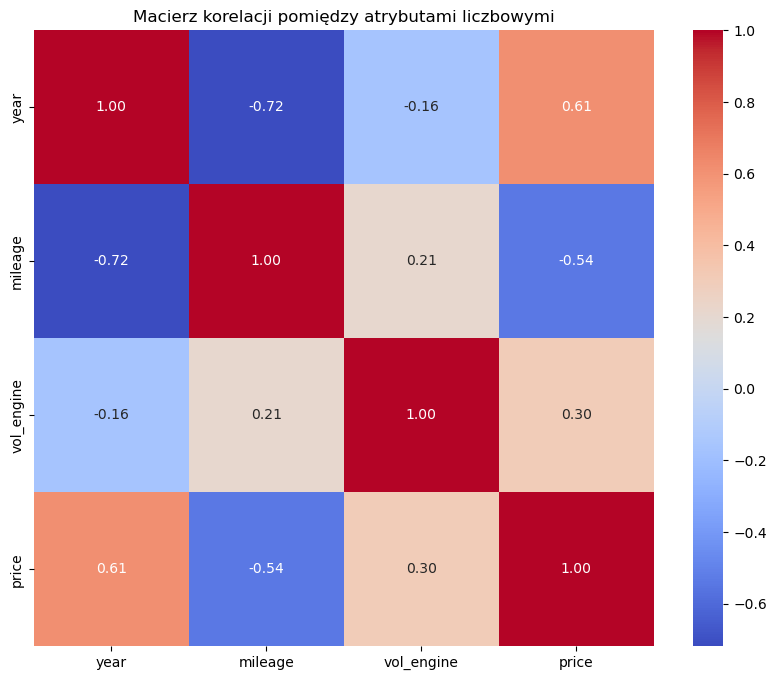

In [7]:
import seaborn as sns

# Ograniczenie danych do kolumn liczbowych
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Obliczenie macierzy korelacji
correlation_matrix = numeric_df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji pomiędzy atrybutami liczbowymi")
plt.show()

0po### Wnioski do punktu 3

* **Zadanie 3 - wnioski**  
  - Najsilniej skorelowane dodatnio są atrybuty `price` (cena) i `year` (rok produkcji) z wartością korelacji **0.61**.
  - Najsilniejsza korelacja ujemna występuje między `year` (rok produkcji) a `mileage` (przebieg) z wartością korelacji **-0.72**.
  - Atrybuty `price`, `year`, i `vol_engine` (pojemność silnika) wykazują największy potencjał do rozróżniania klas (marek), co widać w ich rozkładach.
  - Atrybut `mileage` (przebieg) charakteryzuje się umiarkowaną korelacją z innymi cechami i może mieć mniejsze znaczenie w rozróżnianiu klas.

Macierz korelacji oraz boxploty potwierdzają, że kluczowymi cechami różnicującymi klasy są `price`, `year` oraz `vol_engine`, podczas gdy `mileage` ma bardziej rozproszony charakter.


---
### 4. Analiza nadmiarowości cech

W tej części projektu oceniamy, które atrybuty (zmienne) można uznać za nadmiarowe, wykorzystując wcześniej wygenerowaną macierz korelacji. Usunięcie nadmiarowych cech może uprościć dalsze analizy i zwiększyć efektywność modeli.

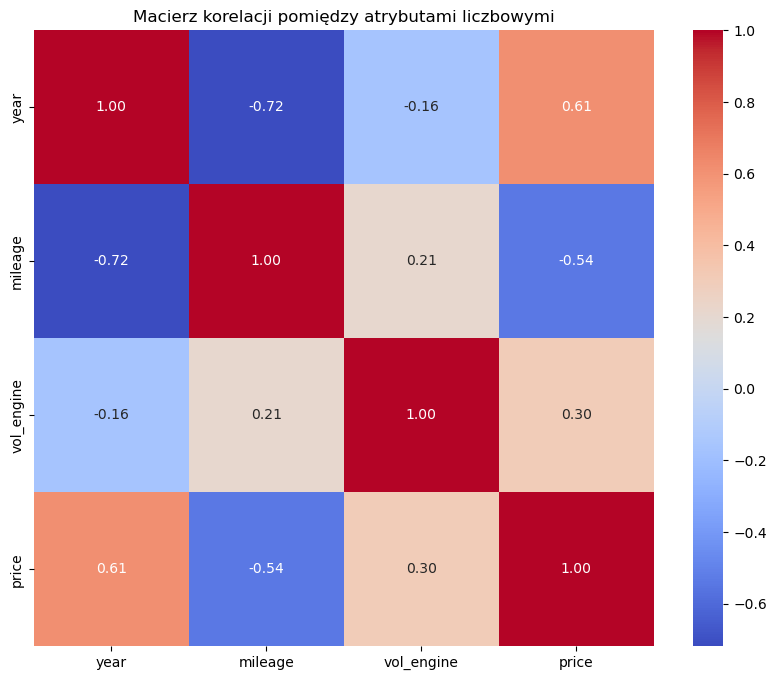

In [8]:
# Ograniczenie danych do kolumn liczbowych
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Obliczenie macierzy korelacji
correlation_matrix = numeric_df.corr()

# Wizualizacja macierzy korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Macierz korelacji pomiędzy atrybutami liczbowymi")
plt.show()

### Wnioski do punktu 4

* **Zadanie 4 - wnioski**
  - Można za nadmiarowy uznać jeden z atrybutów `price` (cena) lub `year` (rok produkcji), ponieważ ich korelacja wynosi **0.60**, co oznacza, że rok produkcji częściowo tłumaczy zmienność ceny.
  - Atrybuty `price` i `vol_engine` (pojemność silnika) są umiarkowanie skorelowane (**0.30**), ale nie wskazuje to jednoznacznie na nadmiarowość.
  - Atrybut `mileage` (przebieg) jest odwrotnie skorelowany z `year` (**-0.72**) oraz `price` (**-0.54**). Mimo tego wnosi dodatkową wartość analityczną i nie należy go usuwać.
  - Ogólnie, żaden atrybut nie jest jednoznacznie nadmiarowy, ale warto rozważyć, czy `year` i `price` są równocześnie potrzebne w pełnej analizie.


---
### 5. Stworzenie i porównanie modeli przewidujących cenę samochodu na podstawie jego atrybutów

W tej części projektu tworzymy i porównujemy modele nauczania maszynowego.

In [99]:
# Importy używanych później funkcjonalności

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,r2_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor

In [34]:
df.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [100]:
dfCopy = df.copy() 
# kopia wykorzystana aby zobaczyć różnicę z wykorzystaniem tylko atrybutów liczbowych, a wykorzystaniem również kategorycznych,  
# z których wybraliśmy  marke, model i rodzaj paliwa

LE=LabelEncoder()
LE.fit(dfCopy["mark"])
dfCopy["Mark"]=LE.transform(dfCopy["mark"])

LE2=LabelEncoder()
LE2.fit(dfCopy["fuel"])
dfCopy["Fuel"]=LE2.transform(dfCopy["fuel"])

LE3=LabelEncoder()
LE3.fit(dfCopy["model"])
dfCopy["Model"]=LE3.transform(dfCopy["model"])

df.drop(columns=["mark","model","fuel","city","province", "generation_name"],axis=1 ,inplace=True ) # odrzucenie nieliczbowych kolumn dla obydwu ram
dfCopy.drop(columns=["mark","model","fuel","city","province", "generation_name"],axis=1 ,inplace=True )

df.head()

,year,mileage,vol_engine,price
0,2015,139568,1248,35900
1,2018,31991,1499,78501
2,2015,278437,1598,27000
3,2016,47600,1248,30800
4,2014,103000,1400,35900


In [67]:
dfCopy.head()

,year,mileage,vol_engine,price,Mark,Fuel,Model
0,2015,139568,1248,35900,12,1,39
1,2018,31991,1499,78501,12,1,39
2,2015,278437,1598,27000,12,1,39
3,2016,47600,1248,30800,12,1,39
4,2014,103000,1400,35900,12,0,39


Do zamiany danych kategorycznych na liczbowe użyliśmy metody grupowania Label Encoder (przypisania unikalnej liczby do każdej kategorii). Jako że metoda ta jest arbitralna (przydzielone liczby nie mają sensu matematycznego, są tylko uporządkowaniem kategorii) spodziewamy się zauważenia wyraźniejszej zmiany przy użyciu regresjii na pogrupowanych danych (dodanie dodatkowych kategorii powinno pozwolić na dokładniejsze pogrupowanie), za to mniejszej poprawy ( w najgorszym wypadku pogorszenia przewidywania) dla danych niepogrupowanych.

In [101]:
# Definiujemy X i Y

X1 = df.drop(columns="price")
y1 = df["price"]

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=42)

X2 = dfCopy.drop(columns="price")
y2 = dfCopy["price"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, random_state=42)

frames = [[X_train1,X_test1,y_train1,y_test1], [X_train2,X_test2,y_train2,y_test2]]

In [69]:
for index, frame in enumerate(frames):
    if index == 0:
        print("Wynik dla tylko liczbowych atrybutów")
    else:
        print("\nWynik dla również kategorycznych atrybutów")
        
    X_train, X_test, y_train, y_test = frame[0], frame[1], frame[2], frame[3]
    
    LinearRegression_model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None)

    # Dopasowanie modelu
    LinearRegression_model.fit(X_train, y_train)

    # Wyniki dla danych treningowych i testowych
    print("Wynik modelu na danych treningowych: ", LinearRegression_model.score(X_train, y_train))
    print("Wynik modelu na danych testowych: ", LinearRegression_model.score(X_test, y_test))

    # Przewidywanie wartości Y na podstawie X_test
    y_pred_LR = LinearRegression_model.predict(X_test)

    # Ewaluacja modelu
    print("Ewaluacja modelu regresji liniowej: średni błąd absolutny wynosi ", mean_absolute_error(y_test, y_pred_LR))
    print("Ewaluacja modelu regresji liniowej: średni błąd kwadratowy wynosi ", mean_squared_error(y_test, y_pred_LR))
    print("Ewaluacja modelu regresji liniowej: medianowy błąd absolutny wynosi ", median_absolute_error(y_test, y_pred_LR))

    print("Ostateczny wynik dla modelu regresji liniowej: ", r2_score(y_test, y_pred_LR))

Wynik dla tylko liczbowych atrybutów
Wynik modelu na danych treningowych:  0.582154387016204
Wynik modelu na danych testowych:  0.5811094125467247
Ewaluacja modelu regresji liniowej: średni błąd absolutny wynosi  29581.00229617352
Ewaluacja modelu regresji liniowej: średni błąd kwadratowy wynosi  2516476149.717725
Ewaluacja modelu regresji liniowej: medianowy błąd absolutny wynosi  19985.19780342281
Ostateczny wynik dla modelu regresji liniowej:  0.5811094125467247

Wynik dla również kategorycznych atrybutów
Wynik modelu na danych treningowych:  0.5906175487875733
Wynik modelu na danych testowych:  0.5897469369798901
Ewaluacja modelu regresji liniowej: średni błąd absolutny wynosi  29502.3872490321
Ewaluacja modelu regresji liniowej: średni błąd kwadratowy wynosi  2464586408.387384
Ewaluacja modelu regresji liniowej: medianowy błąd absolutny wynosi  20327.880131937563
Ostateczny wynik dla modelu regresji liniowej:  0.5897469369798901


Przy wykorzystaniu algorytmu regresjii liniowej dodanie trzech dodatkowych liczbowych argumentów nie wpłynęło znacząco na zmianę dokładności ( doszło do poprawy jedynie o 0,8%), ale nie doprowadziły one do pogorszenia wyniku. Doś wysoki średni błąd kwadratowy sugeruje znaczące odchylenia w przewidywaniach, a więc jego spadek po wykorzystaniu kategorycznych atrybutów sugeruje wykluczenie części dużych błędów. Medianowy błąd absolutny jest niższy od kwadratowego co sugeruje że występują przypadki znacznie zawyżające średnią. Niski wynik ostateczny sugeruje, że istnieją istotne czynniki które nie zostały tu uwzględnione,  lub niedostosowanie modelu do zadania.

In [86]:
print("Regresja liniowa na klastrach utworzonych metodą k-średnich")
for n_clusters in range(2, 11):
    print(f"\nWynik regresjii po podzieleniu danych na {n_clusters} klastrów")
    for index, frame in enumerate(frames):
        if index == 0:
            print("\nWynik dla tylko liczbowych atrybutów")
        else:
            print("\nWynik dla również kategorycznych atrybutów")

        X_train, X_test, y_train, y_test = frame[0], frame[1], frame[2], frame[3]


        # model k-średnich
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        train_clusters = kmeans.fit_predict(X_train)
        test_clusters = kmeans.predict(X_test)

        # Słownik na modele regresji liniowej dla każdego klastra
        cluster_models = {}
        cluster_scores_train = []
        cluster_scores_test = []

        # Trenujemy osobny model regresji liniowej dla każdego klastra
        for cluster in range(n_clusters):
            mask_train = train_clusters == cluster
            X_train_cluster = X_train[mask_train]
            y_train_cluster = y_train[mask_train]

            # Odrzucamy zbyt małe klastry
            if len(X_train_cluster) > 1:
                model = LinearRegression()
                model.fit(X_train_cluster, y_train_cluster)
                cluster_models[cluster] = model

                # Obliczamy wyniki dla klastra
                score_train = model.score(X_train_cluster, y_train_cluster)
                cluster_scores_train.append(score_train)

                mask_test = test_clusters == cluster
                X_test_cluster = X_test[mask_test]
                y_test_cluster = y_test[mask_test]

                if len(X_test_cluster) > 0:
                    score_test = model.score(X_test_cluster, y_test_cluster)
                    cluster_scores_test.append(score_test)

        print(f"\nŚredni wynik dla danych treningowych w klastrach: {np.mean(cluster_scores_train):}")
        print(f"Średni wynik dla danych testowych w klastrach: {np.mean(cluster_scores_test):}")

        # Predykcja na całym zbiorze testowym
        y_pred_clusters = np.zeros_like(y_test)
        for cluster in range(n_clusters):
            mask_test = test_clusters == cluster
            if cluster in cluster_models:
                y_pred_clusters[mask_test] = cluster_models[cluster].predict(X_test[mask_test])

        print(f"Całkowity wynik dla modelu klastrowego: {r2_score(y_test, y_pred_clusters):}")

Regresja liniowa na klastrach utworzonych metodą k-średnich

Wynik regresjii po podzieleniu danych na 2 klastrów

Wynik dla tylko liczbowych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.5914597770548593
Średni wynik dla danych testowych w klastrach: 0.575846725762535
Całkowity wynik dla modelu klastrowego: 0.6683627000612336

Wynik dla również kategorycznych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.6029740391263307
Średni wynik dla danych testowych w klastrach: 0.5866087358394185
Całkowity wynik dla modelu klastrowego: 0.6811740064039038

Wynik regresjii po podzieleniu danych na 3 klastrów

Wynik dla tylko liczbowych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.5790053736177345
Średni wynik dla danych testowych w klastrach: 0.5360276732396273
Całkowity wynik dla modelu klastrowego: 0.6896327366323257

Wynik dla również kategorycznych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.5913542870440938
Średni wynik dla

Wzrosła różnica między modelem utworzonym na jedynie danych pierwotnie liczbowych, oraz tych które zostały rozszerzone o wstępnie kategoryczne do około 1,2%, pozostanie ona w tym zakresie dla każdej sprawdzonej tu liczby klastrów, nadal nie jest ona jednak zbyt duża. Już przy podziale na jedynie 2 klastry można zaobserwować wyraźny wzrost ostatecznego wyniku z 59% do ponad 65%, a więc o około 6 punktów procentowych. Jednak uzyskana z liczby klastrów poprawa szybko się zmniejsza, dla 7 ostateczny wynik wynosi już jedynie (71,956%, 73,311%) a dla 10 (72,514%, 73,861%), a więc około 0,5 punkta procentowego przy zwiększeniu liczby klastrów o 3.

In [87]:
print("Test na modelu Lasu losowego\n")
for index, frame in enumerate(frames):
    if index == 0:
        print("Wynik dla tylko liczbowych atrybutów")
    else:
        print("\nWynik dla również kategorycznych atrybutów")

    X_train, X_test, y_train, y_test = frame[0], frame[1], frame[2], frame[3]
    
    RandomForestRegressor_model = RandomForestRegressor()

    RandomForestRegressor_model.fit(X_train, y_train)

    
    print("Wynik modelu na danych treningowych: ", RandomForestRegressor_model.score(X_train, y_train))
    print("Wynik modelu na danych testowych: ", RandomForestRegressor_model.score(X_test, y_test))

    y_predRFR = RandomForestRegressor_model.predict(X_test)

    print("Ewaluacja modelu: średni błąd absolutny wynosi ", mean_absolute_error(y_test, y_predRFR))
    print("Ewaluacja modelu: średni błąd kwadratowy wynosi ", mean_squared_error(y_test, y_predRFR))
    print("Ewaluacja modelu: medianowy błąd absolutny wynosi ", median_absolute_error(y_test, y_predRFR))
    
    print("Ostateczny wynik dla modelu Lasu Losowego: ", r2_score(y_test, y_predRFR))

Test na moelu Lasu losowego

Wynik dla tylko liczbowych atrybutów
Wynik modelu na danych treningowych:  0.9558264288546702
Wynik modelu na danych testowych:  0.8710806687911333
Ewaluacja modelu: średni błąd absolutny wynosi  13090.752819602623
Ewaluacja modelu: średni błąd kwadratowy wynosi  774480095.618907
Ewaluacja modelu: medianowy błąd absolutny wynosi  5677.28333333334
Ostateczny wynik dla modelu Lasu Losowego:  0.8710806687911333

Wynik dla również kategorycznych atrybutów
Wynik modelu na danych treningowych:  0.9844805000497833
Wynik modelu na danych testowych:  0.9340254633312136
Ewaluacja modelu: średni błąd absolutny wynosi  8002.395774677097
Ewaluacja modelu: średni błąd kwadratowy wynosi  396340602.98429906
Ewaluacja modelu: medianowy błąd absolutny wynosi  3566.9300000000003
Ostateczny wynik dla modelu Lasu Losowego:  0.9340254633312136


Po wybraniu Modelu Lasu Losowego w celu porównania możemy zauważyć że wyniki ostateczne są dużo wyższe bez grupowania niż dla regresji liniowej. Wzrosła również różnica między tylko liczbowymi a również kategorycznymi atrybutami do około 6 punktów procentowych. Zmalała różnica bezwzględna między średnim i medianowym błędem absolutnym, ale zmalała część średniego błędu którą stanowi medianowy, co sugeruje, że chociaż w większości wypadków model jest o wiele bardziej precyzyjny w przewidywaniu, to błędy mają tendencję do bycia bardzo dużymi, a więc bardzo znacznie zaburzają średni błąd absolutny. Niestety model regresji metodą lasu losowego jest dużo wolniejszy w działaniu od regresji liniowej, przez co przy testowaniu go na podzielonych na klastry danych ograniczyliśmy ich liczbę do maksymalnie 5.

In [91]:
print("Regresja lasu losowego na klastrach utworzonych metodą k-średnich")
for n_clusters in range(2, 6):
    print(f"\nWynik regresjii po podzieleniu danych na {n_clusters} klastrów")
    for index, frame in enumerate(frames):
        if index == 0:
            print("\nWynik dla tylko liczbowych atrybutów")
        else:
            print("\nWynik dla również kategorycznych atrybutów")

        X_train, X_test, y_train, y_test = frame[0], frame[1], frame[2], frame[3]


        # model k-średnich
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        train_clusters = kmeans.fit_predict(X_train)
        test_clusters = kmeans.predict(X_test)

        # Słownik na modele regresji liniowej dla każdego klastra
        cluster_models = {}
        cluster_scores_train = []
        cluster_scores_test = []

        # Trenujemy osobny model regresji liniowej dla każdego klastra
        for cluster in range(n_clusters):
            mask_train = train_clusters == cluster
            X_train_cluster = X_train[mask_train]
            y_train_cluster = y_train[mask_train]

            # Odrzucamy zbyt małe klastry
            if len(X_train_cluster) > 1:
                model = RandomForestRegressor()
                model.fit(X_train_cluster, y_train_cluster)
                cluster_models[cluster] = model

                # Obliczamy wyniki dla klastra
                score_train = model.score(X_train_cluster, y_train_cluster)
                cluster_scores_train.append(score_train)

                mask_test = test_clusters == cluster
                X_test_cluster = X_test[mask_test]
                y_test_cluster = y_test[mask_test]

                if len(X_test_cluster) > 0:
                    score_test = model.score(X_test_cluster, y_test_cluster)
                    cluster_scores_test.append(score_test)

        print(f"\nŚredni wynik dla danych treningowych w klastrach: {np.mean(cluster_scores_train):}")
        print(f"Średni wynik dla danych testowych w klastrach: {np.mean(cluster_scores_test):}")

        # Predykcja na całym zbiorze testowym
        y_pred_clusters = np.zeros_like(y_test)
        for cluster in range(n_clusters):
            mask_test = test_clusters == cluster
            if cluster in cluster_models:
                y_pred_clusters[mask_test] = cluster_models[cluster].predict(X_test[mask_test])

        print(f"Całkowity wynik dla modelu klastrowego: {r2_score(y_test, y_pred_clusters):}")

Regresja lasu losowego na klastrach utworzonych metodą k-średnich

Wynik regresjii po podzieleniu danych na 2 klastrów

Wynik dla tylko liczbowych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.9512963107051393
Średni wynik dla danych testowych w klastrach: 0.7875138022840549
Całkowity wynik dla modelu klastrowego: 0.8635752001916095

Wynik dla również kategorycznych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.9823933074652269
Średni wynik dla danych testowych w klastrach: 0.8712488526463804
Całkowity wynik dla modelu klastrowego: 0.9263777702343006

Wynik regresjii po podzieleniu danych na 3 klastrów

Wynik dla tylko liczbowych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.9495512845933208
Średni wynik dla danych testowych w klastrach: 0.7268303101091789
Całkowity wynik dla modelu klastrowego: 0.8647043241335218

Wynik dla również kategorycznych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.9789543965566261
Średni wy

Przy zastosowaniu metody regresji Lasu losowego możemy zauważyć, że przy dzieleniu danych na klastry doszło do spadku precyzji przewidywań ceny. Jako, że las losowy korzysta z różnorodności danych do tworzenia wielu drzew decyzyjnych, ten wynik jest sensowny: po podzieleniu na klastry doszło do spadku różnorodności danych, co ograniczyło skuteczność lasu losowego.

In [90]:
print("Regresja K najbliższych sąsiadów\n")
for index, frame in enumerate(frames):
    if index == 0:
        print("Wynik dla tylko liczbowych atrybutów")
    else:
        print("\nWynik dla również kategorycznych atrybutów")

    X_train, X_test, y_train, y_test = frame[0], frame[1], frame[2], frame[3]

    KNeighborsRegressor_model = KNeighborsRegressor(
        n_neighbors=5,
        weights='uniform',
        algorithm='auto',
        leaf_size=30,
        p=2,
        metric='minkowski',
        metric_params=None,
        n_jobs=None
    )
    KNeighborsRegressor_model.fit(X_train, y_train)

    print("Wynik modelu na danych treningowych: ", KNeighborsRegressor_model.score(X_train, y_train))
    print("Wynik modelu na danych testowych: ", KNeighborsRegressor_model.score(X_test, y_test))

    y_predKN = KNeighborsRegressor_model.predict(X_test)

    print("Ewaluacja modelu: średni błąd absolutny wynosi ", mean_absolute_error(y_test, y_predKN))
    print("Ewaluacja modelu: średni błąd kwadratowy wynosi ", mean_squared_error(y_test, y_predKN))
    print("Ewaluacja modelu: medianowy błąd absolutny wynosi ", median_absolute_error(y_test, y_predKN))
    
    print("Ostateczny wynik dla modelu K sąsiadów: ", r2_score(y_test, y_predKN))


Regresja K najbliższych sąsiadów

Wynik dla tylko liczbowych atrybutów
Wynik modelu na danych treningowych:  0.827657568556983
Wynik modelu na danych testowych:  0.736948741131597
Ewaluacja modelu: średni błąd absolutny wynosi  21327.93470242703
Ewaluacja modelu: średni błąd kwadratowy wynosi  1580274751.7438476
Ewaluacja modelu: medianowy błąd absolutny wynosi  11337.400000000001
Ostateczny wynik dla modelu K sąsiadów:  0.736948741131597

Wynik dla również kategorycznych atrybutów
Wynik modelu na danych treningowych:  0.8441506661131541
Wynik modelu na danych testowych:  0.7492185783546489
Ewaluacja modelu: średni błąd absolutny wynosi  21298.788461363325
Ewaluacja modelu: średni błąd kwadratowy wynosi  1506563969.8414662
Ewaluacja modelu: medianowy błąd absolutny wynosi  12318.0
Ostateczny wynik dla modelu K sąsiadów:  0.7492185783546489


Bez dzielenia danych na klastry możemy zaobserwować dokładnośc przewidywań znajdującą się pomiędzy regresją liniową a lasem losowym. Bezwzględna różnica między błędami średnim i medianowym jest tu największa z modeli ( około 10000 ), jak i stosunek medianowego do średniego błędu wynosi około 1/2, a więc jest większy niż dla metody lasu losowego, przy zachowaniu ogólnej dokładności przewidywań wyższej od regresji liniowej. Sugeruje to, że model ma dużo wartości które albo są dość bliskie dokładnemu wynikowi, albo mocno od niego odbiegają. Jeżeli rzeczywiście istnieje grupa mocno odbiegających błędów grupowanie metodą k średnich powinno poprawić dokładność wyników.

In [92]:
print("Regresja k najbliższych sąsiadów na klastrach utworzonych metodą k-średnich")
for n_clusters in range(2, 11):
    print(f"\nWynik regresjii po podzieleniu danych na {n_clusters} klastrów")
    for index, frame in enumerate(frames):
        if index == 0:
            print("\nWynik dla tylko liczbowych atrybutów")
        else:
            print("\nWynik dla również kategorycznych atrybutów")

        X_train, X_test, y_train, y_test = frame[0], frame[1], frame[2], frame[3]


        # model k-średnich
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        train_clusters = kmeans.fit_predict(X_train)
        test_clusters = kmeans.predict(X_test)

        # Słownik na modele regresji liniowej dla każdego klastra
        cluster_models = {}
        cluster_scores_train = []
        cluster_scores_test = []

        # Trenujemy osobny model regresji liniowej dla każdego klastra
        for cluster in range(n_clusters):
            mask_train = train_clusters == cluster
            X_train_cluster = X_train[mask_train]
            y_train_cluster = y_train[mask_train]

            # Odrzucamy zbyt małe klastry
            if len(X_train_cluster) > 1:
                model = KNeighborsRegressor()
                model.fit(X_train_cluster, y_train_cluster)
                cluster_models[cluster] = model

                # Obliczamy wyniki dla klastra
                score_train = model.score(X_train_cluster, y_train_cluster)
                cluster_scores_train.append(score_train)

                mask_test = test_clusters == cluster
                X_test_cluster = X_test[mask_test]
                y_test_cluster = y_test[mask_test]

                if len(X_test_cluster) > 0:
                    score_test = model.score(X_test_cluster, y_test_cluster)
                    cluster_scores_test.append(score_test)

        print(f"\nŚredni wynik dla danych treningowych w klastrach: {np.mean(cluster_scores_train):}")
        print(f"Średni wynik dla danych testowych w klastrach: {np.mean(cluster_scores_test):}")

        # Predykcja na całym zbiorze testowym
        y_pred_clusters = np.zeros_like(y_test)
        for cluster in range(n_clusters):
            mask_test = test_clusters == cluster
            if cluster in cluster_models:
                y_pred_clusters[mask_test] = cluster_models[cluster].predict(X_test[mask_test])

        print(f"Całkowity wynik dla modelu klastrowego: {r2_score(y_test, y_pred_clusters):}")

Regresja liniowa na klastrach utworzonych metodą k-średnich

Wynik regresjii po podzieleniu danych na 2 klastrów

Wynik dla tylko liczbowych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.7016121007948801
Średni wynik dla danych testowych w klastrach: 0.5288978488881194
Całkowity wynik dla modelu klastrowego: 0.7295607103641379

Wynik dla również kategorycznych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.6964175784890889
Średni wynik dla danych testowych w klastrach: 0.5039231022289992
Całkowity wynik dla modelu klastrowego: 0.7495578978726131

Wynik regresjii po podzieleniu danych na 3 klastrów

Wynik dla tylko liczbowych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.6582628186306145
Średni wynik dla danych testowych w klastrach: 0.44712950630973197
Całkowity wynik dla modelu klastrowego: 0.7323100439059337

Wynik dla również kategorycznych atrybutów

Średni wynik dla danych treningowych w klastrach: 0.6414959784617503
Średni wynik d

Przy użyciu grupowania metodą k średnich dochodzi do bardzo niewielkich zmian w całkowitych wynikach, ale wyraźnie spada wraz z liczbą klastrów średni wynik dla danych treningowych i testowych dla poszczególnych klastrów. Może wynikać to ze zbyt dokładnego przystosowania się do danych treningowych, i zbyt generalnego pogrupowania w ramach klastrów.

---
### 6. Wnioski na temat sprawdzonych modeli
Najlepsze wyniki osiągnęła regresja metodą lasu losowego, bez grupowania danych, ale po uwzględnieniu wybranych atrybutów kategorycznych. Sugeruje to wysokie zróżnicowanie danych. Natomiast każdy z modeli regresji osiągnął lepsze wyniki po uwzględnieniu dodatkowych atrybutów, chociaż powstały one z nadania liczbowych wartości kategoriom. Jedynie regresja liniowa uzyskała dużą poprawę po zastosowaniu przykładowej metody grupowania ( k średnich ) co wskazuje na dalsze pole do optymalizacji przez przetestowanie innych metod grupowania.